<a href="https://colab.research.google.com/github/Caitingg/ML_CrabAgePrediction/blob/main/23005031_ChangCaiTing_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Package

In [ ]:
import math
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
from sklearn.linear_model import LinearRegression
# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
# Lasso Regression
from sklearn.linear_model import Lasso
# Support Vector Regression
from sklearn import svm

# Data Analysis

In [ ]:
# Loading the dataset
DATA_DIR_1 = "/content/ModifiedCrabAgePrediction.csv"

In [ ]:
# Viewing the datasets
CrabAge_df = pd.read_csv(DATA_DIR_1, header = 0)
CrabAge_df

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6
...,...,...,...,...,...,...,...,...,...
3495,I,0.9375,0.6875,0.2375,6.988152,3.118445,1.176504,2.197086,6
3496,F,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10
3497,I,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5
3498,I,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6


The independent variables of the dataset are
- Sex
- Length
- Diameter
- Height
- Weight
- Shucked Weight
- Viscera Weight
- Shell Weight

The dependent variable of the dataset is
- Age

In [ ]:
# Getting information from the dataset
CrabAge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3500 non-null   object 
 1   Length          3456 non-null   float64
 2   Diameter        3468 non-null   float64
 3   Height          3413 non-null   float64
 4   Weight          3462 non-null   float64
 5   Shucked Weight  3500 non-null   float64
 6   Viscera Weight  3500 non-null   float64
 7   Shell Weight    3500 non-null   float64
 8   Age             3500 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 246.2+ KB


This dataset contains a total of 3500 data.
There is one categorical variable (Sex). Changing that categorical variable to numerical value is necessary during Data Preprocessing.

In [ ]:
# Getting statistic for each features (independent variables)
CrabAge_df.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3456.000000,3468.000000,3413.000000,3462.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,1.314131,1.022365,0.350509,23.786946,10.283194,5.168507,6.831221,9.977714
std,0.299806,0.248250,0.106293,13.920088,6.297363,3.116262,3.945384,3.216236
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,1.125000,0.875000,0.287500,12.813974,5.372230,2.689659,3.752765,8.000000
50%,1.375000,1.062500,0.362500,23.119017,9.695529,4.890289,6.704657,10.000000
75%,1.537500,1.200000,0.412500,33.020080,14.330672,7.257472,9.355335,11.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [ ]:
# Checking for null data
CrabAge_df.isnull().sum()

Sex                0
Length            44
Diameter          32
Height            87
Weight            38
Shucked Weight     0
Viscera Weight     0
Shell Weight       0
Age                0
dtype: int64

The dataset contains null data. Handling missing value is necessary during Data Preprocessing.

In [ ]:
# Getting number of unique values
CrabAge_df.nunique()

Sex                  3
Length             132
Diameter           111
Height              51
Weight            2191
Shucked Weight    1435
Viscera Weight     855
Shell Weight       870
Age                 27
dtype: int64

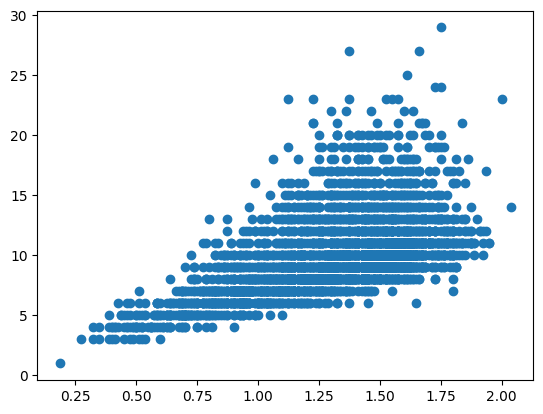

In [ ]:
# Visualizing how Length affects Age
plt.scatter(CrabAge_df['Length'], CrabAge_df['Age'])
plt.show()

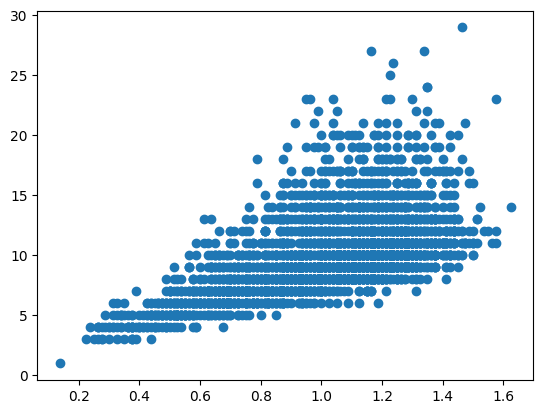

In [ ]:
# Visualizing how Diameter affects Age
plt.scatter(CrabAge_df['Diameter'], CrabAge_df['Age'])
plt.show()

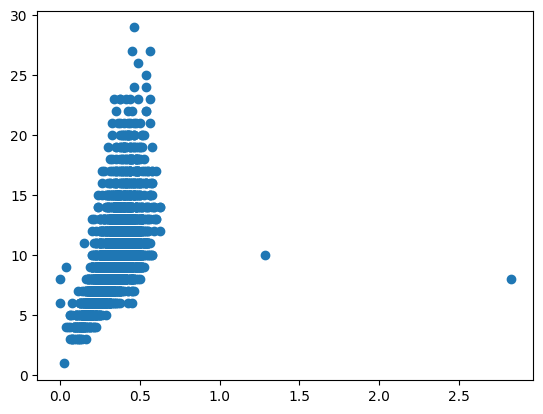

In [ ]:
# Visualizing how Height affects Age
plt.scatter(CrabAge_df['Height'], CrabAge_df['Age'])
plt.show()

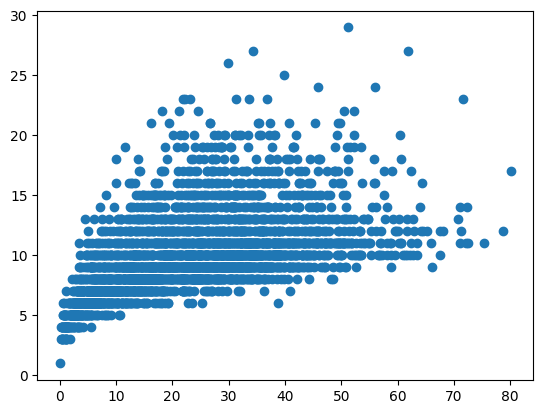

In [ ]:
# Visualizing how Weight affects Age
plt.scatter(CrabAge_df['Weight'], CrabAge_df['Age'])
plt.show()

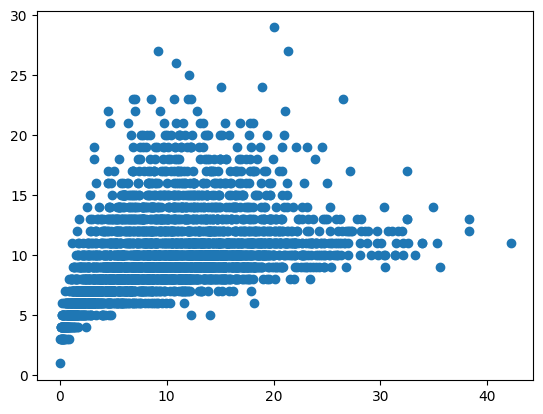

In [ ]:
# Visualizing how Shucked Weight affects Age
plt.scatter(CrabAge_df['Shucked Weight'], CrabAge_df['Age'])
plt.show()

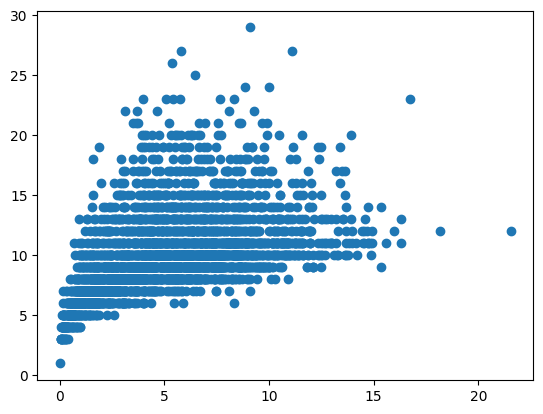

In [ ]:
# Visualizing how Viscera Weight affects Age
plt.scatter(CrabAge_df['Viscera Weight'], CrabAge_df['Age'])
plt.show()

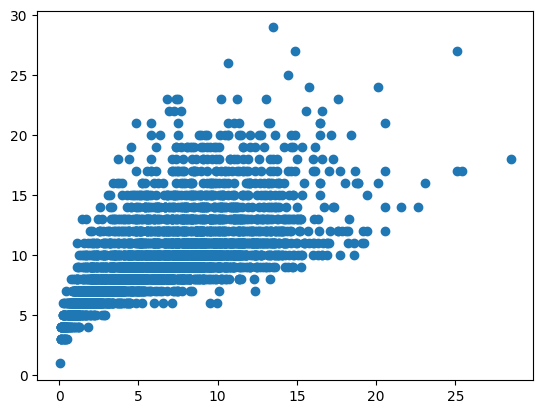

In [ ]:
# Visualizing how Shell Weight affects Age
plt.scatter(CrabAge_df['Shell Weight'], CrabAge_df['Age'])
plt.show()

In [ ]:
# Getting feature names of dataset
CrabAge_df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age'],
      dtype='object')

In [ ]:
# Sorting data based on Age
test = CrabAge_df
test = test.groupby('Age')[['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']].mean().sort_values(by = "Age")
test

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
Age,,,,,,,
1,0.187500,0.137500,0.025000,0.056699,0.028349,0.014175,0.042524
3,0.441346,0.324038,0.104167,0.870566,0.351098,0.182091,0.259507
4,0.562234,0.406117,0.134239,1.754204,0.722912,0.390560,0.528085
5,0.721224,0.533026,0.176053,3.630717,1.814811,0.779907,1.061777
6,0.917195,0.689881,0.226812,7.521886,3.425970,1.628004,2.169344
7,1.046683,0.798438,0.263074,11.085071,5.112977,2.395307,3.117091
8,1.255215,0.968025,0.326030,18.660671,8.535295,4.029019,5.165587
9,1.368880,1.063515,0.357859,24.308792,11.033833,5.356193,6.745609
10,1.434585,1.121823,0.386900,28.667072,12.702886,6.315822,8.043803


<Axes: xlabel='Age'>

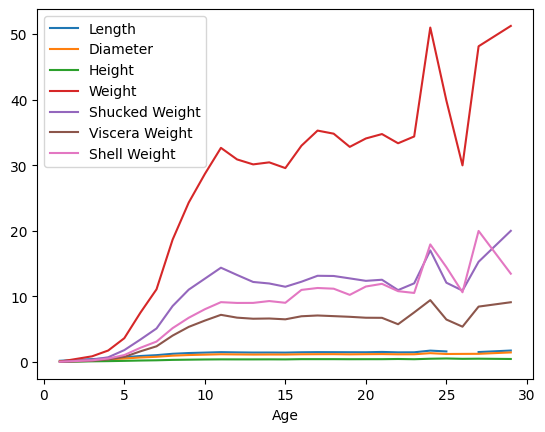

In [ ]:
# Visualizing data with Age as x-axix
test.plot()

<Axes: >

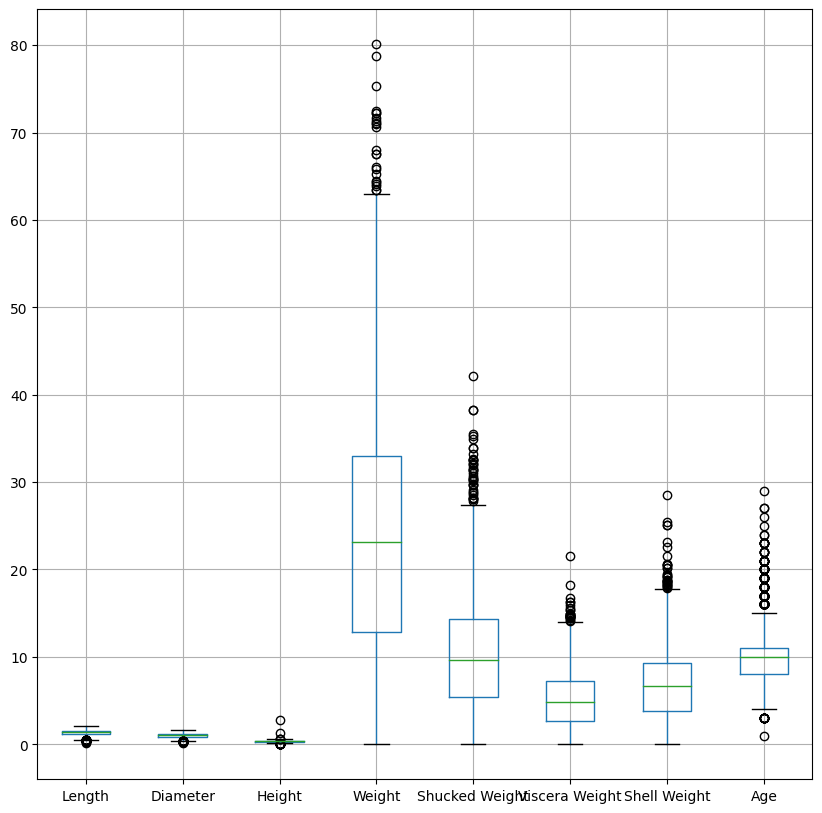

In [ ]:
# Checking datasets for outliers
CrabAge_df.boxplot(figsize = (10, 10))

Each variables contain outliers. Some of the outliers will be removed during Data Preprocessing

# Data Preprocessing

In [ ]:
# Removing null data
print("Remove all null data:")
newCrabAge_df = CrabAge_df.copy().dropna()
print(newCrabAge_df.isna().sum())

Remove all null data:
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64


All null data have been removed from the dataset

In [ ]:
# Removing outlier
temp_df = newCrabAge_df

Q1 = temp_df['Age'].quantile(0.25)
Q3 = temp_df['Age'].quantile(0.75)
IQR = Q3 - Q1

temp_df = temp_df[~((temp_df['Age'] < (Q1 - 1.5 * IQR)) | (temp_df['Age'] > (Q3 + 1.5 * IQR)))]


Q1 = temp_df['Weight'].quantile(0.25)
Q3 = temp_df['Weight'].quantile(0.75)
IQR = Q3 - Q1

temp_df = temp_df[~((temp_df['Weight'] < (Q1 - 1.5 * IQR)) | (temp_df['Weight'] > (Q3 + 1.5 * IQR)))]

Q1 = temp_df['Shucked Weight'].quantile(0.25)
Q3 = temp_df['Shucked Weight'].quantile(0.75)
IQR = Q3 - Q1

temp_df = temp_df[~((temp_df['Shucked Weight'] < (Q1 - 1.5 * IQR)) | (temp_df['Shucked Weight'] > (Q3 + 1.5 * IQR)))]


Q1 = temp_df['Shell Weight'].quantile(0.25)
Q3 = temp_df['Shell Weight'].quantile(0.75)
IQR = Q3 - Q1

temp_df = temp_df[~((temp_df['Shell Weight'] < (Q1 - 1.5 * IQR)) | (temp_df['Shell Weight'] > (Q3 + 1.5 * IQR)))]


newCrabAge_df = temp_df


Outliers of the following varibles have been removed from the dataset:
- Age
- Weight
- Shucked Weight
- Shell Weight

<Axes: >

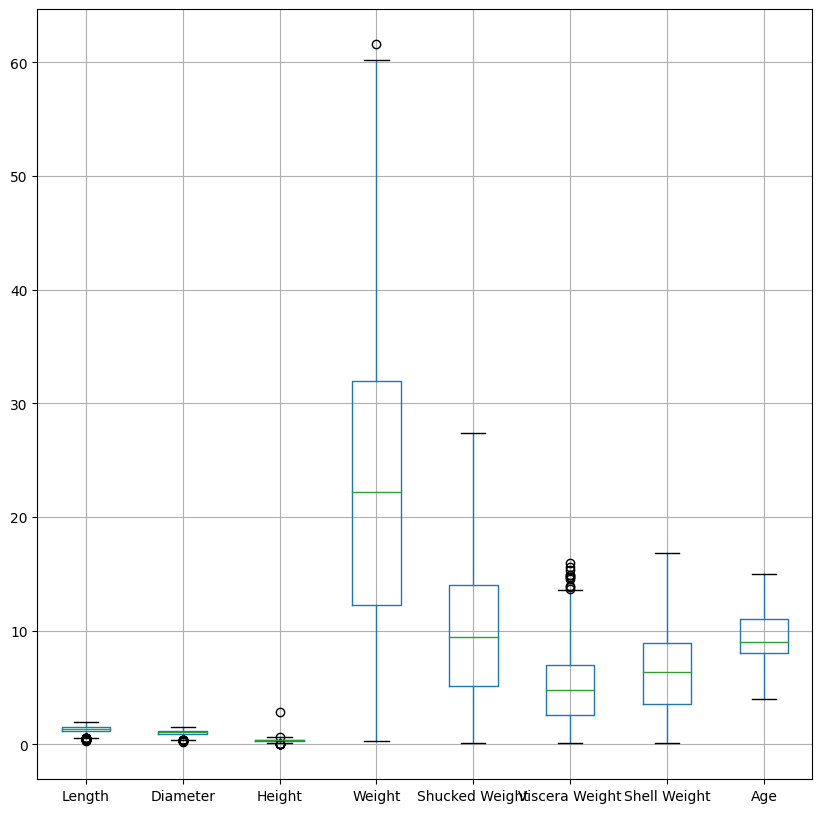

In [ ]:
# Checking datasets for outliers
newCrabAge_df.boxplot(figsize = (10, 10))

In [ ]:
# Sorting data based on Age (After removing outliers)
test = newCrabAge_df
test = test.groupby('Age')[['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']].mean().sort_values(by = "Age")
test

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
Age,,,,,,,
4,0.567045,0.410511,0.135227,1.782797,0.742886,0.397537,0.542506
5,0.722802,0.532555,0.176374,3.634811,1.840693,0.785842,1.069493
6,0.916375,0.690750,0.226687,7.579381,3.434117,1.627049,2.180431
7,1.047817,0.798844,0.262628,11.061402,5.082910,2.388494,3.098105
8,1.256878,0.968465,0.325828,18.638825,8.535983,4.038089,5.166308
9,1.367085,1.062249,0.356797,24.103335,10.939363,5.321972,6.706778
10,1.431064,1.118514,0.382977,28.113545,12.436385,6.214712,7.953556
11,1.493209,1.173163,0.401411,31.662522,13.852302,7.020594,8.931878
12,1.447362,1.135678,0.393530,28.902315,12.380967,6.324147,8.454847


In [ ]:
newCrabAge_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3051 entries, 0 to 3499
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3051 non-null   object 
 1   Length          3051 non-null   float64
 2   Diameter        3051 non-null   float64
 3   Height          3051 non-null   float64
 4   Weight          3051 non-null   float64
 5   Shucked Weight  3051 non-null   float64
 6   Viscera Weight  3051 non-null   float64
 7   Shell Weight    3051 non-null   float64
 8   Age             3051 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 238.4+ KB


In [ ]:
# Replacing Categorical Data with Numbers

newCrabAge_df.Sex.replace({"M": 1, "F": 2, "I": 3}, inplace = True)
newCrabAge_df

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,2,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,1,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,3,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,2,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,3,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6
...,...,...,...,...,...,...,...,...,...
3495,3,0.9375,0.6875,0.2375,6.988152,3.118445,1.176504,2.197086,6
3496,2,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10
3497,3,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5
3498,3,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6


Value of categorical variable (Sex) have been changed to numerical values

In [ ]:
# Using MinMax Scaler Method
from sklearn import preprocessing
minmax_scale = preprocessing.MinMaxScaler().fit_transform (newCrabAge_df)
scaled_frame = pd.DataFrame (minmax_scale, columns = newCrabAge_df.columns)
newCrabAge_df=scaled_frame
print (scaled_frame.head())

   Sex    Length  Diameter    Height    Weight  Shucked Weight  \
0  0.5  0.695312  0.735294  0.146018  0.396994        0.447683   
1  0.0  0.351562  0.323529  0.075221  0.083237        0.079125   
2  1.0  0.445312  0.421569  0.088496  0.124855        0.113483   
3  0.5  0.531250  0.509804  0.088496  0.215029        0.169183   
4  1.0  0.351562  0.333333  0.075221  0.107746        0.121812   

   Viscera Weight  Shell Weight       Age  
0        0.345811      0.396450  0.454545  
1        0.081105      0.087067  0.181818  
2        0.095365      0.158918  0.181818  
3        0.138146      0.306847  0.545455  
4        0.088235      0.095520  0.181818  


The dataset has been standardized.

In [ ]:
# Selecting feature (input) and target (output) variables
# X = newCrabAge.iloc[:, :-1]

X = newCrabAge_df.iloc[:, :-1]
y = newCrabAge_df.iloc[:, -1]

X.describe()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
count,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000
mean,0.482465,0.608991,0.605816,0.121556,0.363234,0.358119,0.306647,0.377956
std,0.415602,0.182035,0.188788,0.036284,0.209093,0.214926,0.184733,0.210675
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.490196,0.097345,0.195376,0.183498,0.155080,0.205410
50%,0.500000,0.640625,0.637255,0.123894,0.357457,0.340448,0.292335,0.374472
75%,1.000000,0.750000,0.745098,0.146018,0.516879,0.510151,0.434046,0.526627
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


X contains the independent variables while y contains dependent variable

# Regression Model Development

# Linear Regression

In [ ]:
# Spliting dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 47)

Simple Linear Regression (Length)

In [ ]:
# Train linear regression model
modelLinear = LinearRegression()
modelLinear.fit(X_train[["Length"]], y_train)

# Make predictions on the test set
y_pred = modelLinear.predict(X_test[["Length"]])

In [ ]:
# Evaluate the model's performance
mse_modelLinear1 = mean_squared_error(y_test, y_pred)
rmse_modelLinear1 = np.sqrt(mse_modelLinear1)
r2_modelLinear1 = r2_score(y_test, y_pred)

print("Model evaluation (Simple Linear Regression - Length):")
print("Mean Squared Error (MSE): ", mse_modelLinear1)
print("Root Mean Squared Error (RMSE): ", rmse_modelLinear1)
print("R-squared (R2) Score: ", r2_modelLinear1)

Model evaluation (Simple Linear Regression - Length):
Mean Squared Error (MSE):  0.026914024256270305
Root Mean Squared Error (RMSE):  0.16405494279743693
R-squared (R2) Score:  0.42691673806140873


Simple Linear Regression (Diameter)

In [ ]:
# Train linear regression model
modelLinear = LinearRegression()
modelLinear.fit(X_train[["Diameter"]], y_train)

# Make predictions on the test set
y_pred = modelLinear.predict(X_test[["Diameter"]])

In [ ]:
# Evaluate the model's performance
mse_modelLinear2 = mean_squared_error(y_test, y_pred)
rmse_modelLinear2 = np.sqrt(mse_modelLinear2)
r2_modelLinear2 = r2_score(y_test, y_pred)

print("Model evaluation (Simple Linear Regression - Diameter):")
print("Mean Squared Error (MSE): ", mse_modelLinear2)
print("Root Mean Squared Error (RMSE): ", rmse_modelLinear2)
print("R-squared (R2) Score: ", r2_modelLinear2)

Model evaluation (Simple Linear Regression - Diameter):
Mean Squared Error (MSE):  0.025886308343522152
Root Mean Squared Error (RMSE):  0.16089222586415464
R-squared (R2) Score:  0.448800005387613


Simple Linear Regression (Height)

In [ ]:
# Train linear regression model
modelLinear = LinearRegression()
modelLinear.fit(X_train[["Height"]], y_train)

# Make predictions on the test set
y_pred = modelLinear.predict(X_test[["Height"]])

In [ ]:
# Evaluate the model's performance
mse_modelLinear3 = mean_squared_error(y_test, y_pred)
rmse_modelLinear3 = np.sqrt(mse_modelLinear3)
r2_modelLinear3 = r2_score(y_test, y_pred)

print("Model evaluation (Simple Linear Regression - Height):")
print("Mean Squared Error (MSE): ", mse_modelLinear3)
print("Root Mean Squared Error (RMSE): ", rmse_modelLinear3)
print("R-squared (R2) Score: ", r2_modelLinear3)

Model evaluation (Simple Linear Regression - Height):
Mean Squared Error (MSE):  0.027077627585481028
Root Mean Squared Error (RMSE):  0.16455281093157
R-squared (R2) Score:  0.4234331144800616


Simple Linear Regression (Weight)

In [ ]:
# Train linear regression model
modelLinear = LinearRegression()
modelLinear.fit(X_train[["Weight"]], y_train)

# Make predictions on the test set
y_pred = modelLinear.predict(X_test[["Weight"]])

In [ ]:
# Evaluate the model's performance
mse_modelLinear4 = mean_squared_error(y_test, y_pred)
rmse_modelLinear4 = np.sqrt(mse_modelLinear4)
r2_modelLinear4 = r2_score(y_test, y_pred)

print("Model evaluation (Simple Linear Regression - Weight):")
print("Mean Squared Error (MSE): ", mse_modelLinear4)
print("Root Mean Squared Error (RMSE): ", rmse_modelLinear4)
print("R-squared (R2) Score: ", r2_modelLinear4)

Model evaluation (Simple Linear Regression - Weight):
Mean Squared Error (MSE):  0.02965690853949049
Root Mean Squared Error (RMSE):  0.17221181300796554
R-squared (R2) Score:  0.36851220304350996


Simple Linear Regression (Shucked Weight)

In [ ]:
# Train linear regression model
modelLinear = LinearRegression()
modelLinear.fit(X_train[["Shucked Weight"]], y_train)

# Make predictions on the test set
y_pred = modelLinear.predict(X_test[["Shucked Weight"]])

In [ ]:
# Evaluate the model's performance
mse_modelLinear5 = mean_squared_error(y_test, y_pred)
rmse_modelLinear5 = np.sqrt(mse_modelLinear5)
r2_modelLinear5 = r2_score(y_test, y_pred)

print("Model evaluation (Simple Linear Regression - Shucked Weight):")
print("Mean Squared Error (MSE): ", mse_modelLinear5)
print("Root Mean Squared Error (RMSE): ", rmse_modelLinear5)
print("R-squared (R2) Score: ", r2_modelLinear5)

Model evaluation (Simple Linear Regression - Shucked Weight):
Mean Squared Error (MSE):  0.033780959052755966
Root Mean Squared Error (RMSE):  0.18379597126367042
R-squared (R2) Score:  0.2806983444381369


Simple Linear Regression (Viscera Weight)

In [ ]:
# Train linear regression model
modelLinear = LinearRegression()
modelLinear.fit(X_train[["Viscera Weight"]], y_train)

# Make predictions on the test set
y_pred = modelLinear.predict(X_test[["Viscera Weight"]])

In [ ]:
# Evaluate the model's performance
mse_modelLinear6 = mean_squared_error(y_test, y_pred)
rmse_modelLinear6 = np.sqrt(mse_modelLinear6)
r2_modelLinear6 = r2_score(y_test, y_pred)

print("Model evaluation (Simple Linear Regression - Viscera Weight):")
print("Mean Squared Error (MSE): ", mse_modelLinear6)
print("Root Mean Squared Error (RMSE): ", rmse_modelLinear6)
print("R-squared (R2) Score: ", r2_modelLinear6)

Model evaluation (Simple Linear Regression - Viscera Weight):
Mean Squared Error (MSE):  0.03050872892350351
Root Mean Squared Error (RMSE):  0.17466748101321983
R-squared (R2) Score:  0.3503742984474615


Simple Linear Regression (Shell Weight)

In [ ]:
# Train linear regression model
modelLinear = LinearRegression()
modelLinear.fit(X_train[["Shell Weight"]], y_train)

# Make predictions on the test set
y_pred = modelLinear.predict(X_test[["Shell Weight"]])

In [ ]:
# Evaluate the model's performance
mse_modelLinear7 = mean_squared_error(y_test, y_pred)
rmse_modelLinear7 = np.sqrt(mse_modelLinear7)
r2_modelLinear7 = r2_score(y_test, y_pred)

print("Model evaluation (Simple Linear Regression - Shell Weight):")
print("Mean Squared Error (MSE): ", mse_modelLinear7)
print("Root Mean Squared Error (RMSE): ", rmse_modelLinear7)
print("R-squared (R2) Score: ", r2_modelLinear7)

Model evaluation (Simple Linear Regression - Shell Weight):
Mean Squared Error (MSE):  0.025693798771654956
Root Mean Squared Error (RMSE):  0.16029285315214448
R-squared (R2) Score:  0.45289913275517324


Multiple Linear Regression

In [ ]:
# Train linear regression model
modelLinear = LinearRegression()
modelLinear.fit(X_train, y_train)

# Make predictions on the test set
y_pred = modelLinear.predict(X_test)

In [ ]:
# Evaluate the model's performance
mse_modelLinear8 = mean_squared_error(y_test, y_pred)
rmse_modelLinear8 = np.sqrt(mse_modelLinear8)
r2_modelLinear8 = r2_score(y_test, y_pred)

print("Model evaluation (Multiple Linear Regression):")
print("Mean Squared Error (MSE): ", mse_modelLinear8)
print("Root Mean Squared Error (RMSE): ", rmse_modelLinear8)
print("R-squared (R2) Score: ", r2_modelLinear8)

Model evaluation (Multiple Linear Regression):
Mean Squared Error (MSE):  0.020339498741463315
Root Mean Squared Error (RMSE):  0.14261661453513513
R-squared (R2) Score:  0.5669088288705821


# Polynomial Regression

In [ ]:
# Setting polynomial features
poly = PolynomialFeatures(degree =2, include_bias = False)

# Creating new features
poly_features = poly.fit_transform(X)

# Spliting dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.2, random_state =8)

# Train Polynomial Regression Model
modelPoly = LinearRegression()
modelPoly.fit(X_train, y_train)

# Make prediction on the test set
y_pred = modelPoly.predict(X_test)

# Evaluate the model's performance
mse_modelPoly = mean_squared_error(y_test, y_pred)
rmse_modelPoly = np.sqrt(mse_modelPoly)
r2_modelPoly = r2_score(y_test, y_pred)

print("Model evaluation (Polynomial Regression):")
print("Mean Squared Error (MSE): ", mse_modelPoly)
print("Root Mean Squared Error (RMSE): ", rmse_modelPoly)
print("R-squared (R2) Score: ", r2_modelPoly)

Model evaluation (Polynomial Regression):
Mean Squared Error (MSE):  0.02034954622870448
Root Mean Squared Error (RMSE):  0.14265183570043702
R-squared (R2) Score:  0.6085969649828751


# Random Forest Regression

In [ ]:
# Spliting dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15)

In [ ]:
# Train Random Forest Regression
modelRandForest = RandomForestRegressor(n_estimators = 600, max_depth = 8)
modelRandForest.fit(X_train, y_train)

# Make prediction on the set
y_pred = modelRandForest.predict(X_test)

In [ ]:
# Evaluate the model's performance
mse_modelRandForest = mean_squared_error(y_test, y_pred)
rmse_modelRandForest = math.sqrt(mse_modelRandForest)
r2_modelRandForest = r2_score(y_test, y_pred)

print("Model evaluation (Random Forest Regression):")
print("Mean Squared Error (MSE): ", mse_modelRandForest)
print("Root Mean Squared Error (RMSE): ", rmse_modelRandForest)
print("R-squared (R2) Score: ", r2_modelRandForest)

Model evaluation (Random Forest Regression):
Mean Squared Error (MSE):  0.0192739267859435
Root Mean Squared Error (RMSE):  0.1388305686293314
R-squared (R2) Score:  0.6162822213298624


# Decision Tree Regression

In [ ]:
# Spliting dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 47)

In [ ]:
# Train Decision Tree Regression
modelDeciTree = DecisionTreeRegressor(max_depth = 4)
modelDeciTree.fit(X_train, y_train)

# Make prediction on the set
y_pred = modelDeciTree.predict(X_test)

In [ ]:
# Evaluate the model's performance
mse_modelDeciTree = mean_squared_error(y_test, y_pred)
rmse_modelDeciTree = math.sqrt(mse_modelDeciTree)
r2_modelDeciTree = r2_score(y_test, y_pred)

print("Model evaluation (Decision Tree Regression):")
print("Mean Squared Error (MSE): ", mse_modelDeciTree)
print("Root Mean Squared Error (RMSE): ", rmse_modelDeciTree)
print("R-squared (R2) Score: ", r2_modelDeciTree)

Model evaluation (Decision Tree Regression):
Mean Squared Error (MSE):  0.021005954343681736
Root Mean Squared Error (RMSE):  0.14493431044332372
R-squared (R2) Score:  0.5527179168456886


# Lasso Regression

In [ ]:
# Spliting dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 47)

In [ ]:
# Train Lasso Regression
modelLasso = Lasso(alpha = 0.0001)
modelLasso.fit(X_train, y_train)

# Make prediction on the set
y_pred = modelLasso.predict(X_test)

In [ ]:
# Evaluate the model's performance
mse_modelLasso = mean_squared_error(y_test, y_pred)
rmse_modelLasso = math.sqrt(mse_modelLasso)
r2_modelLasso = r2_score(y_test, y_pred)

print("Model evaluation (Lasso Regression):")
print("Mean Squared Error (MSE): ", mse_modelLasso)
print("Root Mean Squared Error (RMSE): ", rmse_modelLasso)
print("R-squared (R2) Score: ", r2_modelLasso)

Model evaluation (Lasso Regression):
Mean Squared Error (MSE):  0.02041139678451657
Root Mean Squared Error (RMSE):  0.1428684597261291
R-squared (R2) Score:  0.5653778959767262


# Support Vector Regression

In [ ]:
# Spliting dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 39)

In [ ]:
# Train Support Vector Regression module
modelSVM = svm.SVR(C = 150, epsilon = 1)
modelSVM.fit(X_train, y_train)

# Make prediction on the set
y_pred = modelSVM.predict(X_test)

In [ ]:
# Evaluate the model's performance
mse_modelSVM = mean_squared_error(y_test, y_pred)
rmse_modelSVM = math.sqrt(mse_modelSVM)
r2_modelSVM = r2_score(y_test, y_pred)

print("Model evaluation (Support Vector Regression):")
print("Mean Squared Error (MSE): ", mse_modelSVM)
print("Root Mean Squared Error (RMSE): ", rmse_modelSVM)
print("R-squared (R2) Score: ", r2_modelSVM)

Model evaluation (Support Vector Regression):
Mean Squared Error (MSE):  0.04691874856284914
Root Mean Squared Error (RMSE):  0.21660736036166717
R-squared (R2) Score:  -0.0037091998670184534


# Model Evaluation

**Model Evaluation**

To determine which model performs best for the dataset, I compare the evaluation metrics (MSE, RMSE, R2) obtained from each model.

- Mean Squared Error (MSE): This metric measures the average squared difference between the actual and predicted values. Lower MSE indicates better performance.

- Root Mean Squared Error (RMSE): RMSE is the square root of MSE and represents the average deviation of the predicted values from the actual values. Like MSE, lower RMSE indicates better performance.

- R-squared (R2): R2 represents the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, where higher values indicate better fit. An R2 value closer to 1 suggests that the model explains a larger portion of the variance in the target variable.

Based on these metrics, compare the performance of different models as follows:

--> Lower MSE and RMSE: Models with lower MSE and RMSE are preferred as they indicate smaller errors in prediction.

--> Higher R2: Models with higher R2 values are preferred as they explain a larger portion of the variance in the target variable.

# Result Summary

In [ ]:
# Organize all the result into a table
result_table = [
    {'Types of Model': 'Simple Linear Regression - Length', 'Hyperparameters used (Best)': '-', 'Mean Squared Error (MSE)': mse_modelLinear1, 'Root Mean Squared Error (RMSE)': rmse_modelLinear1, 'R-squared (R2) Score': r2_modelLinear1},
    {'Types of Model': 'Simple Linear Regression - Diameter', 'Hyperparameters used (Best)': '-', 'Mean Squared Error (MSE)': mse_modelLinear2, 'Root Mean Squared Error (RMSE)': rmse_modelLinear2, 'R-squared (R2) Score': r2_modelLinear2},
    {'Types of Model': 'Simple Linear Regression - Height', 'Hyperparameters used (Best)': '-', 'Mean Squared Error (MSE)': mse_modelLinear3, 'Root Mean Squared Error (RMSE)': rmse_modelLinear3, 'R-squared (R2) Score': r2_modelLinear3},
    {'Types of Model': 'Simple Linear Regression - Weight', 'Hyperparameters used (Best)': '-', 'Mean Squared Error (MSE)': mse_modelLinear4, 'Root Mean Squared Error (RMSE)': rmse_modelLinear4, 'R-squared (R2) Score': r2_modelLinear4},
    {'Types of Model': 'Simple Linear Regression - Shucked Weight', 'Hyperparameters used (Best)': '-', 'Mean Squared Error (MSE)': mse_modelLinear5, 'Root Mean Squared Error (RMSE)': rmse_modelLinear5, 'R-squared (R2) Score': r2_modelLinear5},
    {'Types of Model': 'Simple Linear Regression - Viscera Weight', 'Hyperparameters used (Best)': '-', 'Mean Squared Error (MSE)': mse_modelLinear6, 'Root Mean Squared Error (RMSE)': rmse_modelLinear6, 'R-squared (R2) Score': r2_modelLinear6},
    {'Types of Model': 'Simple Linear Regression - Shell Weight', 'Hyperparameters used (Best)': '-', 'Mean Squared Error (MSE)': mse_modelLinear7, 'Root Mean Squared Error (RMSE)': rmse_modelLinear7, 'R-squared (R2) Score': r2_modelLinear7},
    {'Types of Model': 'Multiple Linear Regression', 'Hyperparameters used (Best)': '-', 'Mean Squared Error (MSE)': mse_modelLinear8, 'Root Mean Squared Error (RMSE)': rmse_modelLinear8, 'R-squared (R2) Score': r2_modelLinear8},
    {'Types of Model': 'Polynomial Regression', 'Hyperparameters used (Best)': 'degree =2', 'Mean Squared Error (MSE)': mse_modelPoly, 'Root Mean Squared Error (RMSE)': rmse_modelPoly, 'R-squared (R2) Score': r2_modelPoly},
    {'Types of Model': 'Random Forest Regression', 'Hyperparameters used (Best)': 'n_estimators = 600, max_depth = 8', 'Mean Squared Error (MSE)': mse_modelRandForest, 'Root Mean Squared Error (RMSE)': rmse_modelRandForest, 'R-squared (R2) Score': r2_modelRandForest},
    {'Types of Model': 'Decision Tree Regression', 'Hyperparameters used (Best)': 'max_depth = 4', 'Mean Squared Error (MSE)': mse_modelDeciTree, 'Root Mean Squared Error (RMSE)': rmse_modelDeciTree, 'R-squared (R2) Score': r2_modelDeciTree},
    {'Types of Model': 'Lasso Regression', 'Hyperparameters used (Best)': 'alpha = 0.0001', 'Mean Squared Error (MSE)': mse_modelLasso, 'Root Mean Squared Error (RMSE)': rmse_modelLasso, 'R-squared (R2) Score': r2_modelLasso},
    {'Types of Model': 'Support Vector Regression', 'Hyperparameters used (Best)': 'C = 150, epsilon = 1', 'Mean Squared Error (MSE)': mse_modelSVM, 'Root Mean Squared Error (RMSE)': rmse_modelSVM, 'R-squared (R2) Score': r2_modelSVM},
]
result_table_df = pd.DataFrame(result_table)
result_table_df

,Types of Model,Hyperparameters used (Best),Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R-squared (R2) Score
0,Simple Linear Regression - Length,-,0.026914,0.164055,0.426917
1,Simple Linear Regression - Diameter,-,0.025886,0.160892,0.448800
2,Simple Linear Regression - Height,-,0.027078,0.164553,0.423433
3,Simple Linear Regression - Weight,-,0.029657,0.172212,0.368512
4,Simple Linear Regression - Shucked Weight,-,0.033781,0.183796,0.280698
5,Simple Linear Regression - Viscera Weight,-,0.030509,0.174667,0.350374
6,Simple Linear Regression - Shell Weight,-,0.025694,0.160293,0.452899
7,Multiple Linear Regression,-,0.020339,0.142617,0.566909
8,Polynomial Regression,degree =2,0.020350,0.142652,0.608597
9,Random Forest Regression,"n_estimators = 600, max_depth = 8",0.019274,0.138831,0.616282


In [ ]:
# Sorting the table by R2 Score from highest to Lowest
result_table_df.sort_values(by = 'R-squared (R2) Score', ascending = False)

,Types of Model,Hyperparameters used (Best),Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R-squared (R2) Score
9,Random Forest Regression,"n_estimators = 600, max_depth = 8",0.019274,0.138831,0.616282
8,Polynomial Regression,degree =2,0.020350,0.142652,0.608597
7,Multiple Linear Regression,-,0.020339,0.142617,0.566909
11,Lasso Regression,alpha = 0.0001,0.020411,0.142868,0.565378
10,Decision Tree Regression,max_depth = 4,0.021006,0.144934,0.552718
6,Simple Linear Regression - Shell Weight,-,0.025694,0.160293,0.452899
1,Simple Linear Regression - Diameter,-,0.025886,0.160892,0.448800
0,Simple Linear Regression - Length,-,0.026914,0.164055,0.426917
2,Simple Linear Regression - Height,-,0.027078,0.164553,0.423433
3,Simple Linear Regression - Weight,-,0.029657,0.172212,0.368512


# Conclusion

From the table above, Random Forest Regression with the best hyperparameters ( n_estimators = 600, max_depth = 8) demonstrates the best predictive performance among all models evaluated.
The low MSE (0.019274) and RMSE (0.138831) values indicate that the model's predictions are close to the actual values on average.
The high R2 score of 0.616282 suggests that the model explains a significant portion of the variance in the target variable.